In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('temps/temp4.csv')

# Calculate correlations for entire dataset
corr_matrix = df[['PTS/G', 'PPP', 'D1 PPG', 'Composite Score']].corr()

# Split into top and bottom performers
top_100 = df.nlargest(100, 'Composite Score')
bottom_100 = df.nsmallest(100, 'Composite Score')
print(df['Composite Score'].describe()) 


count    126.000000
mean       0.445794
std        0.214157
min        0.107000
25%        0.279250
50%        0.415500
75%        0.596000
max        0.970000
Name: Composite Score, dtype: float64


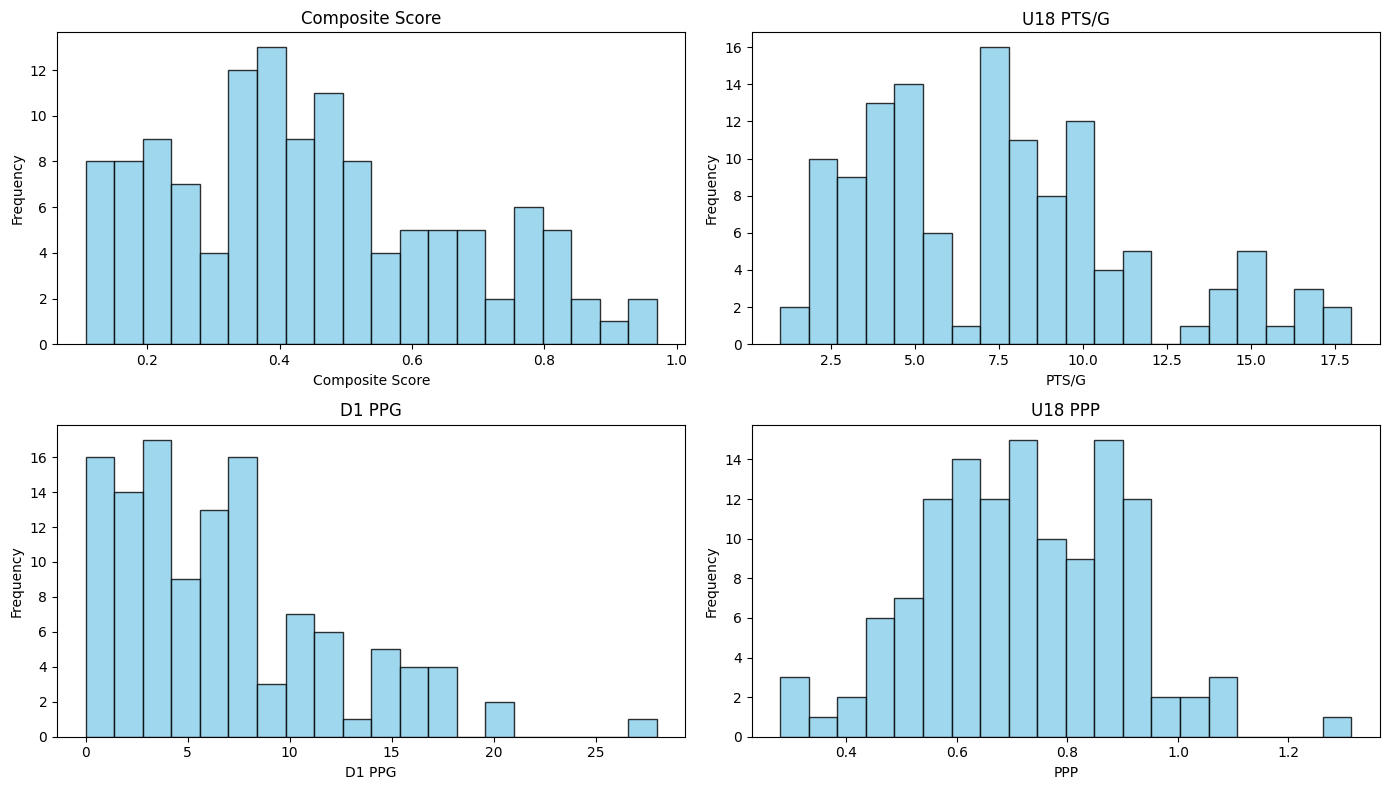

In [17]:
plt.figure(figsize=(14, 8))

columns = ['Composite Score', 'PTS/G', 'D1 PPG', 'PPP']
titles = ['Composite Score', 'U18 PTS/G', 'D1 PPG', 'U18 PPP']

for i, (col, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.8)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
median_comp = df['Composite Score'].median()
# Plotting function
def plot_comparison(data, title):
    plt.figure(figsize=(12, 5))
    # Scatter: U18 PTS/G vs Composite Score
    plt.subplot(1, 2, 1)
    sns.regplot(x='PTS/G', y='Composite Score', data=data)
    for i, row in data.iloc[::7].iterrows():  # Label every 7th player
        plt.text(row['PTS/G'], row['Composite Score'], row['Player'], fontsize=8)
    plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
    plt.title(f'{title}: U18 PPG vs Composite')
    
    # Scatter: U18 PPP vs Composite Score
    plt.subplot(1, 2, 2)
    sns.regplot(x='PPP', y='Composite Score', data=data)
    for i, row in data.iloc[::7].iterrows():
        plt.text(row['PPP'], row['Composite Score'], row['Player'], fontsize=8)
    plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
    plt.title(f'{title}: U18 PPP vs Composite')
    
    plt.tight_layout()
    plt.show()


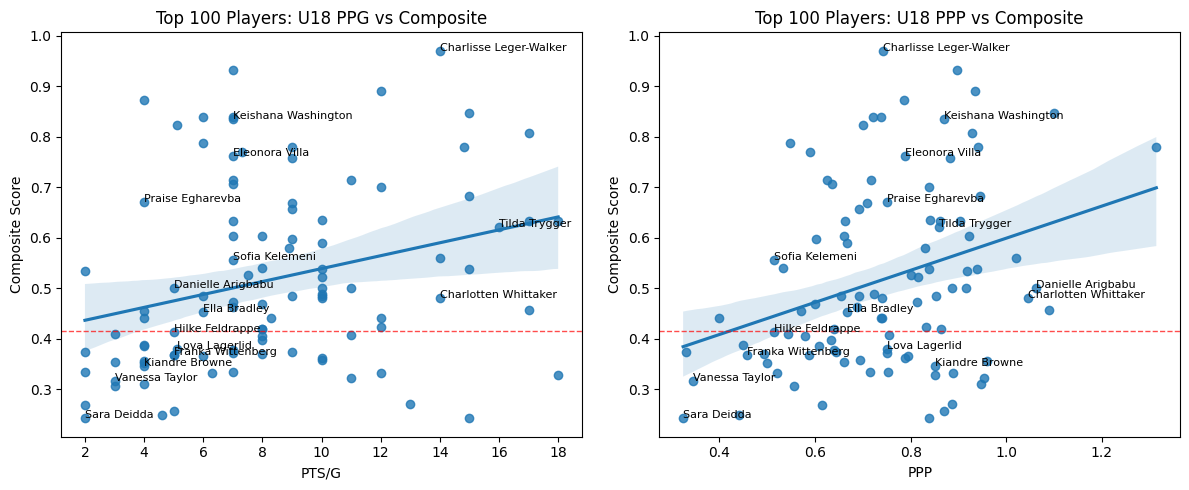

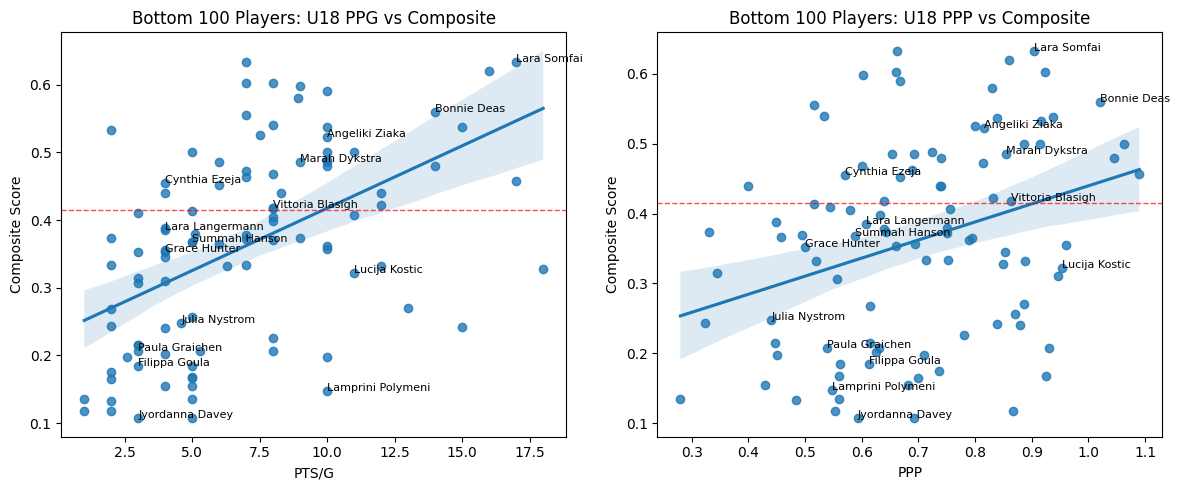

In [16]:

# Generate plots
plot_comparison(top_100, 'Top 100 Players')
plot_comparison(bottom_100, 'Bottom 100 Players')


In [18]:

# Print correlations
print("Top 100 Correlations:")
print(top_100[['PTS/G', 'PPP', 'D1 PPG']].corrwith(top_100['Composite Score']))

print("\nBottom 100 Correlations:")
print(bottom_100[['PTS/G', 'PPP', 'D1 PPG']].corrwith(bottom_100['Composite Score']))

Top 100 Correlations:
PTS/G     0.283163
PPP       0.315582
D1 PPG    0.789155
dtype: float64

Bottom 100 Correlations:
PTS/G     0.504747
PPP       0.320589
D1 PPG    0.569717
dtype: float64


In [ ]:
dfadfla;dfa;dkf;akf